# DSE 2262 MACHINE LEARNING LABORATORY


## Week 2 - EXER 2:

### 1. For the IRIS data set write down the meta information.

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
- Iris Setosa

- Iris Versicolour

- Iris Virginica

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Iris.csv")

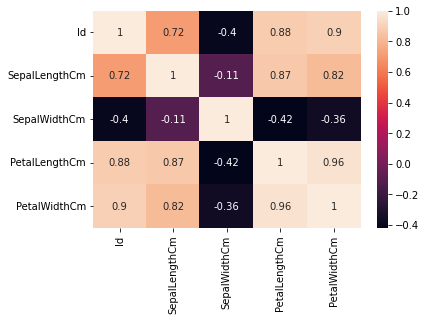

In [3]:
sns.heatmap(df.corr(), annot=True)

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df['Species'].to_numpy()

In [6]:
X = df.drop(['Species'],axis=1)

### 2. Visualize the class label against the predictor variable using appropriate plots.

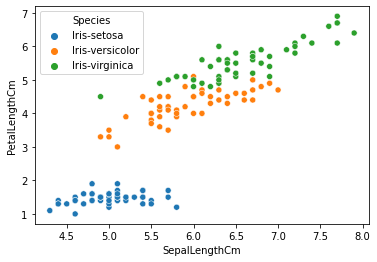

In [7]:
sns.scatterplot(data=df, x="SepalLengthCm",y = "PetalLengthCm" ,hue="Species")

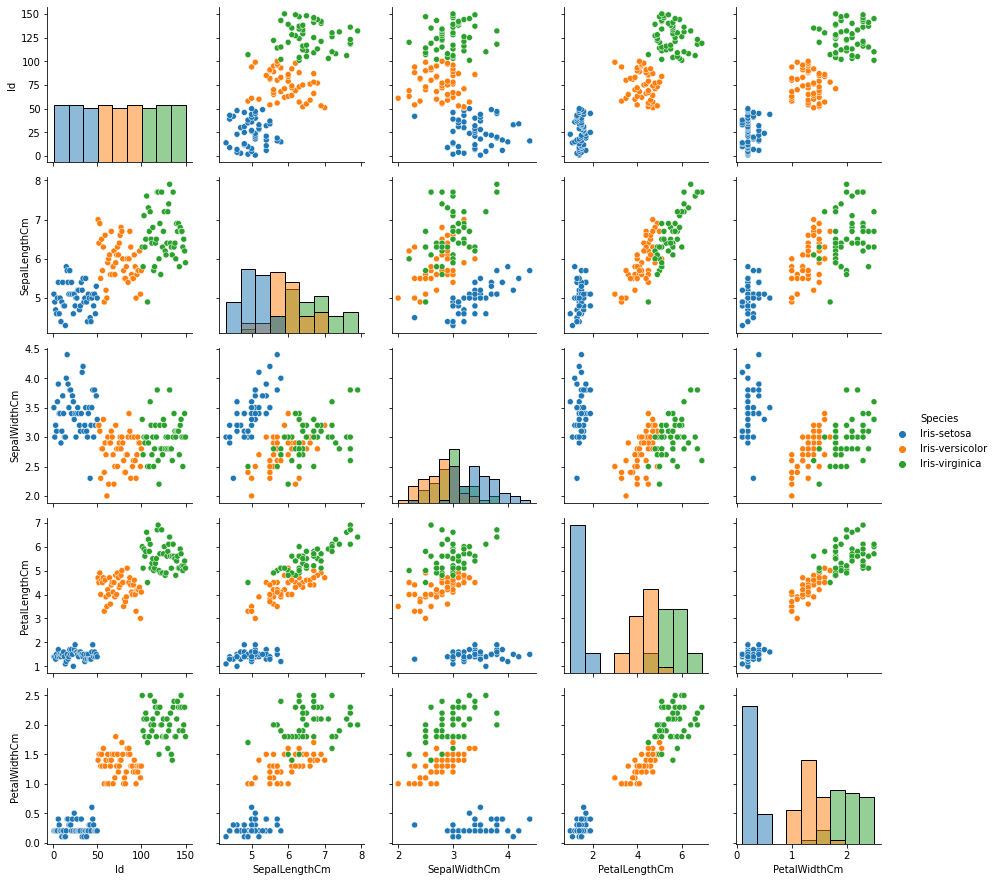

In [8]:
g = sns.PairGrid(df, hue="Species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

##### Helper function for q5

In [9]:
def plot_roc_curve(X, y, _classifier, caller):
    algor_name = type(_classifier).__name__
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.3, random_state = 5)
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
    fig = plt.figure()
    plt.style.use('default')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('ROC to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
def plot_precision_recall_curve(X, y, _classifier, caller):
    algor_name = type(_classifier).__name__
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.3, random_state = 5)
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    # plot confusion_matrix
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    fig = plt.figure()
    plt.title('Confusion Matrix: ' + caller, fontsize=14)
    plt.suptitle(algor_name, fontsize=16)
    plt.style.use('default')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 10})
    plt.show()

### 3. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 
 

In [10]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
'''st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)'''

'st_x= StandardScaler()    \nX_train= st_x.fit_transform(X_train)    \nX_test= st_x.transform(X_test)'

In [13]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 4. Analysis and visualize the performance of the classifier using metrics, confusion matrix .

In [14]:
logreg.score(X_test,y_test)

1.0

In [15]:
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

In [16]:
algor_name = type(logreg).__name__
caller = 'Iris dataset'
rpt = classification_report(y_test, y_pred)
cfm = confusion_matrix(y_pred, y_test)
print("accuracy: {}".format(round(accuracy_score(y_test, y_pred), 3)))
print("log loss: {}".format(round(log_loss(y_test, y_proba), 3)))
print(rpt)
print(cfm)

accuracy: 1.0
log loss: 0.003
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


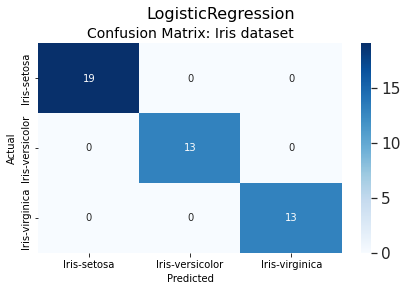

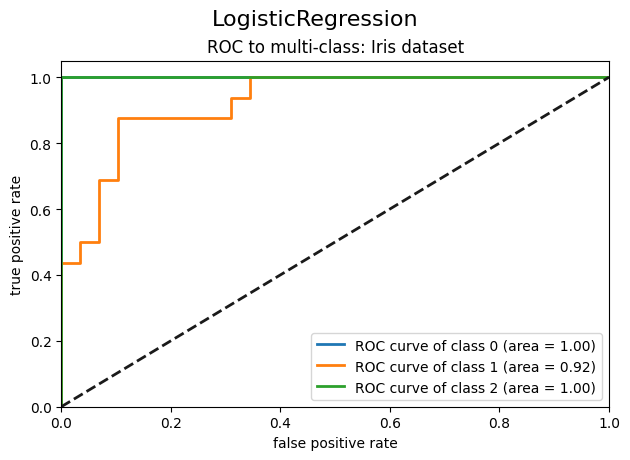

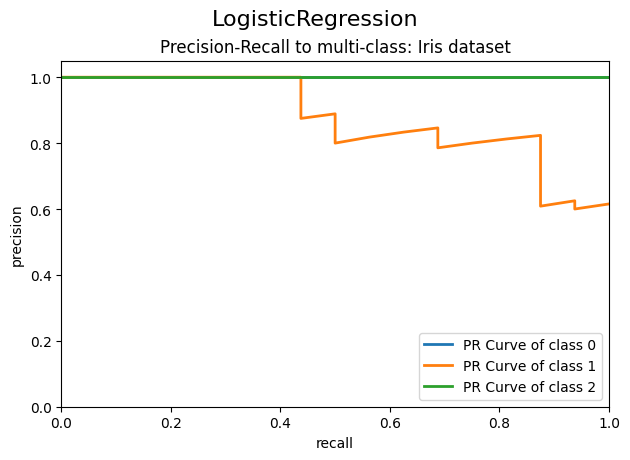

In [17]:
try:
    plot_confusion_matrix(cfm, y_test, caller, algor_name)
except ValueError:
    print("Error: cannot plot the confusion matrix.")
# Need more research to plot the ROC and PR curve for XGBoost and SVC
if not isinstance(logreg, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, logreg, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, logreg, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")

###5. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [20]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
neigh.score(X_train, y_train)

1.0

In [22]:
neigh.score(X_test,y_test)

1.0

In [23]:
y_pred = neigh.predict(X_test)
algor_name = type(neigh).__name__
caller = 'Iris dataset'
rpt = classification_report(y_test, y_pred)
cfm = confusion_matrix(y_pred, y_test)
print("accuracy: {}".format(round(accuracy_score(y_test, y_pred), 3)))
print("log loss: {}".format(round(log_loss(y_test, y_proba), 3)))
print(rpt)
print('confusion matrix for KNeighborsClassifier:\n',confusion_matrix(y_test,y_pred))
print('multi label confusion matrix for KNeighborsClassifier:\n',multilabel_confusion_matrix(y_test, y_pred,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))

accuracy: 1.0
log loss: 0.003
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

confusion matrix for KNeighborsClassifier:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
multi label confusion matrix for KNeighborsClassifier:
 [[[26  0]
  [ 0 19]]

 [[32  0]
  [ 0 13]]

 [[32  0]
  [ 0 13]]]


In [24]:
error_rate = []
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.0 at K = 2


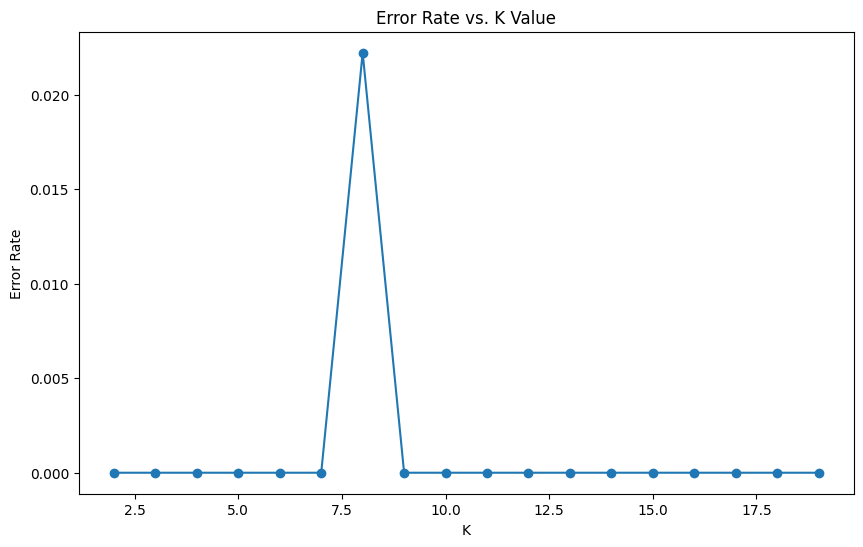

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),error_rate)
plt.scatter(range(2,20),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value+1)

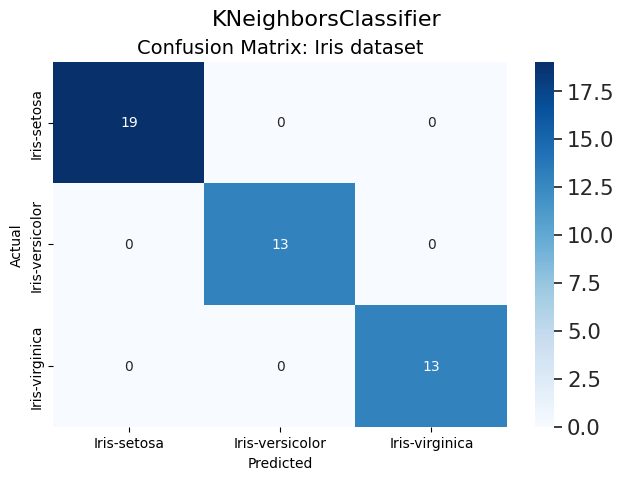

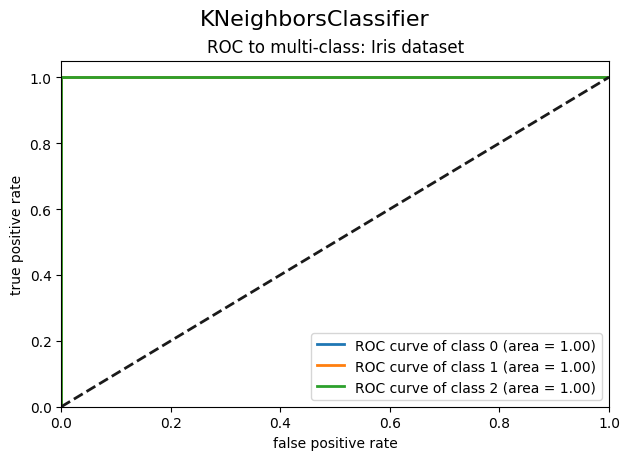

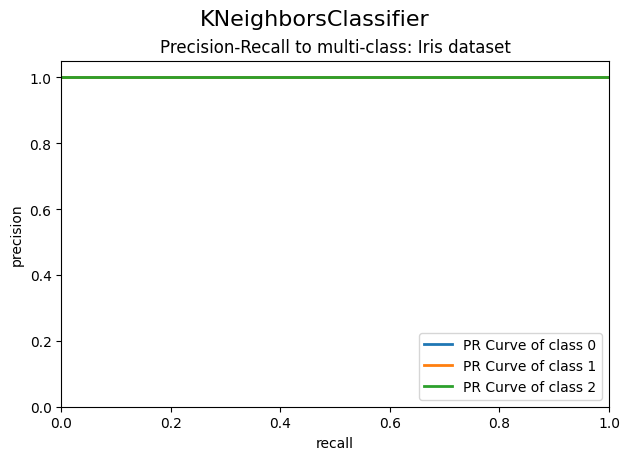

In [26]:
try:
    plot_confusion_matrix(cfm, y_test, caller, algor_name)
except ValueError:
    print("Error: cannot plot the confusion matrix.")
# Need more research to plot the ROC and PR curve for XGBoost and SVC
if not isinstance(neigh, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, neigh, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, neigh, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")

### 7. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset.


- Since ROC Curve Area (ROC-AUC) for class 1 in Logistic Regression is less than that in KNN while others are same. 
- We consider KNN to be better suited to this dataset having a better erformance.
